# COMP551 Assignment 1

Group 19 - Yanfei Chen, Yuhe Liu, Ying Luo

# **Task 1: Acquire, preprocess, and analyze the data**


Main data cleaning steps:
*   Drop duplicates and features with too many missing values
*   Investigate data basic statistics and distribution
*   Impute missing values (impute binary data with "most frequent", numerical data with median)
*   Select features for models according to their importance
*   For KNN, remove outliner and conduct scaling

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
from google.colab import files 

from IPython.core.debugger import set_trace

!pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### *Dataset I: hepatitis.data*

In [ ]:
#optional: read local csv file
uploaded = files.upload()

columns = ['Class','Age', 'Sex', 'Steroid', 
        'Antivirals', 'Fatigue', 'Malaise', 
        'Anorexia', 'Liver Big', 'Liver Firm',
        'Spleen Palpable', 'Spiders', 'Ascites',
        'Varices', 'Bilirubin', 'Alk Phosphate',
        'Sgot', 'Albumin', 'Protime', 'Histology']

hepa_df = pd.read_csv(io.BytesIO(uploaded['hepatitis.data']), names=columns)
hepa_df

Saving hepatitis.data to hepatitis (1).data


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [ ]:
# drop duplicates
hepa_df2 = hepa_df.drop_duplicates()
hepa_df2.shape

(155, 20)

In [ ]:
hepa_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   Age              155 non-null    int64 
 2   Sex              155 non-null    int64 
 3   Steroid          155 non-null    object
 4   Antivirals       155 non-null    int64 
 5   Fatigue          155 non-null    object
 6   Malaise          155 non-null    object
 7   Anorexia         155 non-null    object
 8   Liver Big        155 non-null    object
 9   Liver Firm       155 non-null    object
 10  Spleen Palpable  155 non-null    object
 11  Spiders          155 non-null    object
 12  Ascites          155 non-null    object
 13  Varices          155 non-null    object
 14  Bilirubin        155 non-null    object
 15  Alk Phosphate    155 non-null    object
 16  Sgot             155 non-null    object
 17  Albumin          155 non-null    ob

**Note:**

There's no duplicates in this dataset.

In [ ]:
hepa_df2.eq('?').sum()

Class               0
Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk Phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0
dtype: int64

**Note:** 

Ignore following features when doing feature selections as they have too many missing values, which will largely affect the result.

Features: Liver Big, Liver Firm, Alk Phosphate, Albumin, Protime

In [ ]:
from sklearn.impute import SimpleImputer
hepa_df2=hepa_df.replace('?',np.nan)
hepa_df2 #cleaned

#predict missing binary value by using most frequent value
imputer =SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer =imputer.fit(hepa_df2[['Steroid','Fatigue','Malaise','Anorexia','Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices']]) 
hepa_df2[['Steroid','Fatigue','Malaise','Anorexia','Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices']] = imputer.transform(hepa_df2[['Steroid','Fatigue','Malaise','Anorexia','Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices']] ) 
hepa_df2
#predict missing numerical value by using median value
imputer =SimpleImputer(missing_values=np.nan, strategy='median')
imputer =imputer.fit(hepa_df2[['Bilirubin','Alk Phosphate','Sgot', 'Albumin','Protime']]) 
hepa_df2[['Bilirubin','Alk Phosphate','Sgot', 'Albumin','Protime']] = imputer.transform(hepa_df2[['Bilirubin','Alk Phosphate','Sgot', 'Albumin','Protime']] ) 
hepa_df2

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0,18.0,4.0,61.0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0,42.0,3.5,61.0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32.0,4.0,61.0,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85.0,200.0,4.0,61.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,85.0,242.0,3.3,50.0,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126.0,142.0,4.3,61.0,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75.0,20.0,4.1,61.0,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81.0,19.0,4.1,48.0,2


In [ ]:
hepa_df2.eq('?').sum()

Class              0
Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0
dtype: int64

In [ ]:
# Compute the descriptive statistics of the dataset
hepa_df2.describe()

,Class,Age,Sex,Antivirals,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.410968,101.522581,85.174194,3.836129,61.483871,1.451613
std,0.406070,12.565878,0.305240,0.362923,1.191178,47.082042,88.590122,0.619267,17.198745,0.499266
min,1.000000,7.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,0.800000,78.000000,32.500000,3.500000,57.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000,85.000000,58.000000,4.000000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eeb2acfd0>,
      dtype=object)

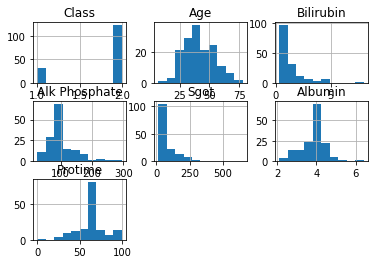

In [ ]:
hepa_df2.hist(column = ['Class', 'Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime'])

**KNN preprocessing**

Insepct and remove outliners of numerical data

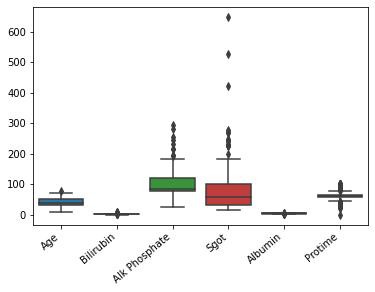

In [ ]:
# KNN preprocessing
# Insepct and remove outliners of numerical data
hepa_df_knn = hepa_df2
bp = sns.boxplot(data = hepa_df_knn[['Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']])
bp.set_xticklabels(bp.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [ ]:
def removeOutliner(dataset):
    for i in dataset:
        q1, q3 = dataset[i].quantile([0.25,0.75])
        n = 1.5
        iqr = q3-q1
        UB = q3 + n*iqr
        max_value = dataset[i][dataset[i]< UB].max()
        LB = q1 - n*iqr
        min_value = dataset[i][dataset[i]> LB].min()
        dataset[i].loc[dataset[i]>UB] = max_value
        dataset[i].loc[dataset[i]<LB] = min_value
    return

In [ ]:
hepa_data_out = hepa_df_knn[['Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin']]
removeOutliner(hepa_data_out)
hepa_df_knn[['Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin']] = hepa_data_out[['Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin']]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


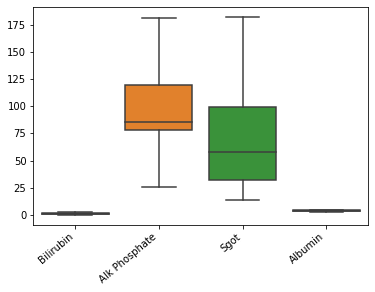

In [ ]:
bp = sns.boxplot(data = hepa_df_knn[['Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin']])
bp.set_xticklabels(bp.get_xticklabels(), rotation=40, ha="right")
plt.show()

**KNN preprocessing**

Scaling

In [ ]:
# KNN preprocessing
# Scaling
hepa_df_scale = hepa_df_knn[['Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']]
hepa_df_scale

,Age,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime
0,30,1.0,85.0,18.0,4.0,61.0
1,50,0.9,135.0,42.0,3.5,61.0
2,78,0.7,96.0,32.0,4.0,61.0
3,31,0.7,46.0,52.0,4.0,80.0
4,34,1.0,85.0,182.0,4.0,61.0
...,...,...,...,...,...,...
150,46,2.5,85.0,182.0,3.3,50.0
151,44,0.9,126.0,142.0,4.3,61.0
152,61,0.8,75.0,20.0,4.1,61.0
153,53,1.5,81.0,19.0,4.1,48.0


In [ ]:
# Build the function for standardization

def data_scale (dataset):
    col_name = list(dataset.columns)
    for var in col_name:
        var_list = []
        mean_value = dataset[var].mean()
        std_value = dataset[var].std()     
        for i in dataset[var]:
            i = (i - mean_value) / std_value
            var_list.append(i)
        dataset[var] = var_list
    return

In [ ]:
# Standardize the numerical data
data_scale(hepa_df_scale)
hepa_df_scale

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Age,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime
0,-0.891303,-0.353961,-0.349798,-1.073993,0.294052,-0.028134
1,0.700309,-0.516280,0.959199,-0.615085,-0.589244,-0.028134
2,2.928566,-0.840919,-0.061818,-0.806296,0.294052,-0.028134
3,-0.811722,-0.840919,-1.370816,-0.423873,0.294052,1.076598
4,-0.572980,-0.353961,-0.349798,2.061878,0.294052,-0.028134
...,...,...,...,...,...,...
150,0.381987,2.080829,-0.349798,2.061878,-0.942563,-0.667716
151,0.222826,-0.516280,0.723580,1.297032,0.824030,-0.028134
152,1.575696,-0.678600,-0.611597,-1.035750,0.470711,-0.028134
153,0.939051,0.457636,-0.454518,-1.054871,0.470711,-0.784003


In [ ]:
# scikit-learn method to verify if the function calculate correctly
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = hepa_df_scale

scaledX = scale.fit_transform(X)

print(scaledX)

[[-0.89419175 -0.35510824 -0.3509317  -1.07747389  0.29500533 -0.02822528]
 [ 0.70257923 -0.51795374  0.96230861 -0.61707843 -0.5911541  -0.02822528]
 [ 2.93805862 -0.84364473 -0.06201883 -0.80890988  0.29500533 -0.02822528]
 [-0.8143532  -0.84364473 -1.37525915 -0.42524699  0.29500533  1.0800875 ]
 [-0.57483756 -0.35510824 -0.3509317   2.06856176  0.29500533 -0.02822528]
 [-0.57483756 -0.51795374 -0.08828364 -0.88564245  0.29500533  0.78842624]
 [ 0.78241778 -0.35510824 -0.3509317  -0.31014813  0.29500533 -0.02822528]
 [-1.4530616  -0.35510824 -0.3509317  -0.31014813  0.29500533 -0.02822528]
 [-0.17564481 -0.84364473 -0.3509317  -0.50197957  1.00393288 -0.02822528]
 [-0.89419175 -0.35510824 -0.3509317   0.87920682  0.11777345 -0.02822528]
 [-0.17564481  0.13342824 -0.53478535 -0.84727616  1.00393288  1.37174876]
 [-0.73451465 -0.35510824 -1.03381666  2.06856176 -0.23669033 -0.43655105]
 [-0.01596771 -0.51795374 -0.45599093 -0.27178184  0.11777345 -0.55321555]
 [-0.89419175  1.5990377 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eea966b50>,
      dtype=object)

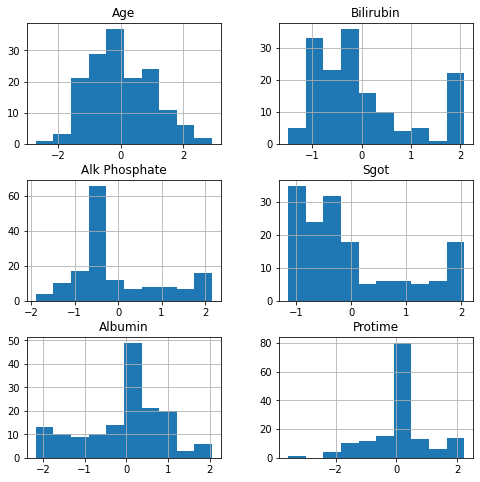

In [ ]:
pd.DataFrame.hist(hepa_df_scale, figsize = [8,8])

In [ ]:
hepa_df_knn[['Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']] = hepa_df_scale[['Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']]
hepa_df_knn

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,-0.891303,2,1,2,2,2,2,1,2,2,2,2,2,-0.353961,-0.349798,-1.073993,0.294052,-0.028134,1
1,2,0.700309,1,1,2,1,2,2,1,2,2,2,2,2,-0.516280,0.959199,-0.615085,-0.589244,-0.028134,1
2,2,2.928566,1,2,2,1,2,2,2,2,2,2,2,2,-0.840919,-0.061818,-0.806296,0.294052,-0.028134,1
3,2,-0.811722,1,2,1,2,2,2,2,2,2,2,2,2,-0.840919,-1.370816,-0.423873,0.294052,1.076598,1
4,2,-0.572980,1,2,2,2,2,2,2,2,2,2,2,2,-0.353961,-0.349798,2.061878,0.294052,-0.028134,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,0.381987,1,2,2,1,1,1,2,2,2,1,1,1,2.080829,-0.349798,2.061878,-0.942563,-0.667716,2
151,2,0.222826,1,2,2,1,2,2,2,1,2,2,2,2,-0.516280,0.723580,1.297032,0.824030,-0.028134,2
152,2,1.575696,1,1,2,1,1,2,1,1,2,1,2,2,-0.678600,-0.611597,-1.035750,0.470711,-0.028134,2
153,2,0.939051,2,1,2,1,2,2,2,2,1,1,2,1,0.457636,-0.454518,-1.054871,0.470711,-0.784003,2


### *Dataset II: messidor_features*

In [ ]:
import pandas as pd
import io
from google.colab import files 
uploaded = files.upload()

columns_m=['quality_assessment','pre-screening','MAs_number_a0.5', 'MAs_number_a0.6', 'MAs_number_a0.7', 
        'MAs_number_a0.8', 'MAs_number_a0.9', 'MAs_number_a1.0', 
        'MAs_number_a0.5_N', 'MAs_number_a0.6_N', 'MAs_number_a0.7_N', 
        'MAs_number_a0.8_N', 'MAs_number_a0.9_N', 'MAs_number_a1.0_N','MAs_number_14_N','MAs_number_15_N',
        'macula_opticdisc_center_distance', 'opticdisc_diameter', 'AM/FM_classification',
        'class']
mess_df = pd.read_csv(io.BytesIO(uploaded['messidor_features.arff']), names=columns_m, skiprows=24)

mess_df

Saving messidor_features.arff to messidor_features (1).arff


,quality_assessment,pre-screening,MAs_number_a0.5,MAs_number_a0.6,MAs_number_a0.7,MAs_number_a0.8,MAs_number_a0.9,MAs_number_a1.0,MAs_number_a0.5_N,MAs_number_a0.6_N,MAs_number_a0.7_N,MAs_number_a0.8_N,MAs_number_a0.9_N,MAs_number_a1.0_N,MAs_number_14_N,MAs_number_15_N,macula_opticdisc_center_distance,opticdisc_diameter,AM/FM_classification,class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,1,34,34,34,33,31,24,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1147,1,1,49,49,49,49,45,37,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1148,1,0,49,48,48,45,43,33,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1149,1,1,39,36,29,23,13,7,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


In [ ]:
mess_df.where(mess_df==np.nan).any(axis = 0)

quality_assessment                  False
pre-screening                       False
MAs_number_a0.5                     False
MAs_number_a0.6                     False
MAs_number_a0.7                     False
MAs_number_a0.8                     False
MAs_number_a0.9                     False
MAs_number_a1.0                     False
MAs_number_a0.5_N                   False
MAs_number_a0.6_N                   False
MAs_number_a0.7_N                   False
MAs_number_a0.8_N                   False
MAs_number_a0.9_N                   False
MAs_number_a1.0_N                   False
MAs_number_14_N                     False
MAs_number_15_N                     False
macula_opticdisc_center_distance    False
opticdisc_diameter                  False
AM/FM_classification                False
class                               False
dtype: bool

In [ ]:
mess_df2 = mess_df.drop_duplicates()
mess_df2.shape 

(1146, 20)

In [ ]:
mess_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 0 to 1150
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   quality_assessment                1146 non-null   int64  
 1   pre-screening                     1146 non-null   int64  
 2   MAs_number_a0.5                   1146 non-null   int64  
 3   MAs_number_a0.6                   1146 non-null   int64  
 4   MAs_number_a0.7                   1146 non-null   int64  
 5   MAs_number_a0.8                   1146 non-null   int64  
 6   MAs_number_a0.9                   1146 non-null   int64  
 7   MAs_number_a1.0                   1146 non-null   int64  
 8   MAs_number_a0.5_N                 1146 non-null   float64
 9   MAs_number_a0.6_N                 1146 non-null   float64
 10  MAs_number_a0.7_N                 1146 non-null   float64
 11  MAs_number_a0.8_N                 1146 non-null   float64
 12  MAs_nu

In [ ]:
mess_df2.describe()

,quality_assessment,pre-screening,MAs_number_a0.5,MAs_number_a0.6,MAs_number_a0.7,MAs_number_a0.8,MAs_number_a0.9,MAs_number_a1.0,MAs_number_a0.5_N,MAs_number_a0.6_N,MAs_number_a0.7_N,MAs_number_a0.8_N,MAs_number_a0.9_N,MAs_number_a1.0_N,MAs_number_14_N,MAs_number_15_N,macula_opticdisc_center_distance,opticdisc_diameter,AM/FM_classification,class
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,0.996510,0.917976,38.366492,36.847295,35.077661,32.230366,28.673647,21.089005,64.261137,23.135397,8.726845,1.841033,0.562519,0.213042,0.085952,0.037320,0.523169,0.108472,0.337696,0.528796
std,0.059002,0.274522,25.644361,24.123378,22.819131,21.117992,19.502277,15.090728,58.542557,21.626029,11.582606,3.930244,2.489344,1.059367,0.399561,0.179337,0.028082,0.017963,0.473131,0.499388
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.336230,7.944090,1.269613,0.081552,0.000000,0.000000,0.000000,0.000000,0.502692,0.095786,0.000000,0.000000
50%,1.000000,1.000000,35.000000,34.000000,32.000000,29.000000,25.000000,18.000000,44.391984,17.060762,4.445557,0.487401,0.022149,0.001551,0.000000,0.000000,0.523277,0.106640,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.915325,31.310584,11.775557,1.925969,0.192363,0.037403,0.004809,0.003850,0.543678,0.119750,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eea64c0d0>,
      dtype=object)

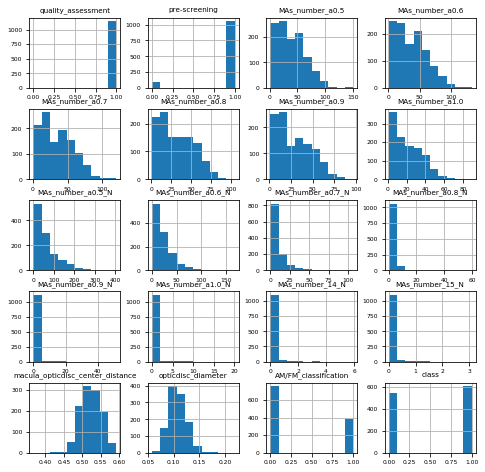

In [ ]:
plt.rcParams.update({'font.size': 6})
pd.DataFrame.hist(mess_df2, figsize = [8,8])

In [ ]:
mess_knn = mess_df2

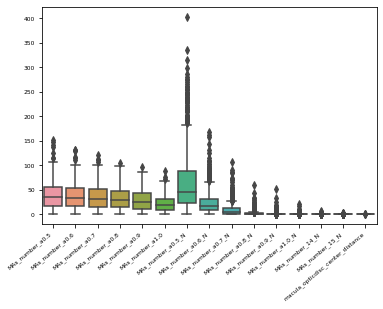

In [ ]:
bp = sns.boxplot(data = mess_knn.iloc[: , 2:17])
bp.set_xticklabels(bp.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [ ]:
mess_data_out = mess_knn.iloc[: , 2:17]
removeOutliner(mess_data_out)
mess_knn.iloc[: , 2:17] = mess_data_out


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


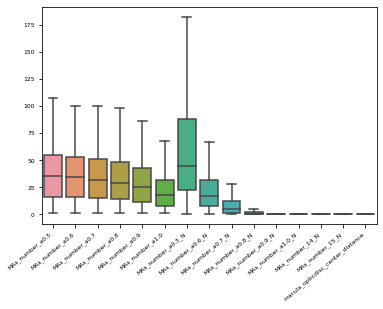

In [ ]:
bp = sns.boxplot(data = mess_knn.iloc[: , 2:17])
bp.set_xticklabels(bp.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [ ]:
mess_df_scale = mess_knn.iloc[: , 2:17]
data_scale(mess_df_scale)
mess_knn.iloc[: , 2:17] = mess_df_scale
mess_knn

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,quality_assessment,pre-screening,MAs_number_a0.5,MAs_number_a0.6,MAs_number_a0.7,MAs_number_a0.8,MAs_number_a0.9,MAs_number_a1.0,MAs_number_a0.5_N,MAs_number_a0.6_N,MAs_number_a0.7_N,MAs_number_a0.8_N,MAs_number_a0.9_N,MAs_number_a1.0_N,MAs_number_14_N,MAs_number_15_N,macula_opticdisc_center_distance,opticdisc_diameter,AM/FM_classification,class
0,1,1,-0.645444,-0.620199,-0.574675,-0.626804,-0.547680,-0.471296,-0.231480,-0.238501,-0.304796,-0.318470,-0.615561,-0.463513,0.201391,0.522562,-1.317246,0.100025,1,0
1,1,1,-0.565802,-0.535992,-0.574675,-0.674202,-0.650396,-0.538100,-0.078296,0.100290,-0.541317,-0.665603,-0.698111,-0.544768,0.196969,0.516828,-0.086284,0.144414,0,0
2,1,1,0.947404,0.979731,1.056668,1.032127,0.941691,0.797968,-0.115121,0.336157,0.596860,2.139829,1.958664,1.907328,1.848137,1.618011,0.275566,0.128548,0,1
3,1,1,0.668656,0.685007,0.792126,0.842535,0.736261,0.664361,-0.416312,-0.200822,0.163016,1.171674,1.958664,1.907328,1.025980,-0.163204,-1.448252,0.114790,0,0
4,1,1,0.230623,0.306077,0.395313,0.415953,0.530830,0.397148,-0.856232,-0.756207,-0.895708,-0.816825,-0.719986,-0.651872,-0.665864,-0.602128,-1.714282,0.123572,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,1,-0.167590,-0.114958,-0.045591,0.036769,0.119969,0.196738,-1.090581,-1.185501,-0.941813,-0.814813,-0.719986,-0.651872,-0.665864,-0.602128,0.513252,0.116795,0,0
1147,1,1,0.429729,0.516594,0.615765,0.795137,0.838976,1.065182,0.029273,0.301499,0.035216,-0.184295,-0.711288,-0.651872,-0.665864,-0.602128,-0.237416,0.124190,0,0
1148,1,0,0.429729,0.474490,0.571674,0.605545,0.736261,0.797968,-0.612451,-0.452720,-0.731229,-0.727805,-0.657097,-0.651872,-0.665864,-0.602128,1.351703,0.129843,0,0
1149,1,1,0.031516,-0.030751,-0.266043,-0.437212,-0.804469,-0.938920,-0.415165,-0.529321,-0.369230,-0.120998,1.958664,1.907328,1.848137,2.065249,-1.350948,0.106690,1,1


# **Decision Tree** - Task 2: Implementing KNN and DT

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
np.random.seed(1234)

# Class Node
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    
        self.left = None                                  
        self.right = None                                 
        self.split_feature = None                         
        self.split_value = None                             
        if parent:
            self.depth = parent.depth + 1                   
            self.num_classes = parent.num_classes           
            self.data = parent.data                         
            self.labels = parent.labels                     
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) 
            self.class_prob = class_prob / np.sum(class_prob)

def greedy_test(node, cost_fn):
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue                                                       
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    return 1 - np.max(class_probs)

def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              
    return -np.sum(class_probs * np.log2(class_probs))       

def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))

In [ ]:
# class DecisionTree
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=20, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      
        self.root = None               
        self.cost_fn = cost_fn          
        self.num_classes = num_classes  
        self.min_leaf_instances = min_leaf_instances  
        
    def fit(self, data, labels):
        pass                           
    
    def predict(self, data_test):
        pass


def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    if np.isinf(cost):
        return
    test = node.data[node.data_indices,split_feature] <= split_value
    node.split_feature = split_feature
    node.split_value = split_value
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    self._fit_tree(left)
    self._fit_tree(right)
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

In [ ]:
def eva_accuracy (y_pred, y_test):
    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    return accuracy*100

# **Decision Tree** - Task 3: Running experiments


### *Dataset I: hepatitis.data*

In [ ]:
# features selection for DT
# ignore the features mentioned above in the missing value checking part. (Liver Big, Liver Firm, Alk Phosphate, Albumin, Protime)

x_ = np.array(hepa_df2[['Age', 'Sex', 'Steroid', 
        'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 
        'Spleen Palpable', 'Spiders', 'Ascites',
        'Varices', 'Bilirubin','Sgot', 'Histology']])

y_ = np.array(hepa_df2['Class'])

model = DecisionTreeRegressor()
model.fit(x_, y_)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.21611
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.04703
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01969
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.02042
Feature: 8, Score: 0.07976
Feature: 9, Score: 0.22027
Feature: 10, Score: 0.03716
Feature: 11, Score: 0.19809
Feature: 12, Score: 0.15621
Feature: 13, Score: 0.00525


**Note:**

Top three importance fetures: feature 0 (Age), feature 9 (Ascites), feature 11 (Bilirubin)

As feature 9 (Ascites) is binary variable, we choose feature 0 (Age) and feature 11 (Bilirubin) to fit our decision tree model. We only select two features because it's easier to visualize the tree in the plot later.

In [ ]:
np.random.seed(91)
# Apply into the dataset
hepa_df2['Bilirubin'] = pd.to_numeric(hepa_df2['Bilirubin'])
# hepa_df2['SGOT'] = pd.to_numeric(hepa_df2['SGOT'])
feature_cols = ['Age','Bilirubin']
x = np.array(hepa_df2[feature_cols])
y = np.array(hepa_df2['Class'])
(num_instances, num_features), num_classes = x.shape, np.max(y)+2
inds = np.random.permutation(num_instances)

#train-test split

x_train, y_train = x[inds[:100]], y[inds[:100]]
x_test, y_test = x[inds[100:]], y[inds[100:]]


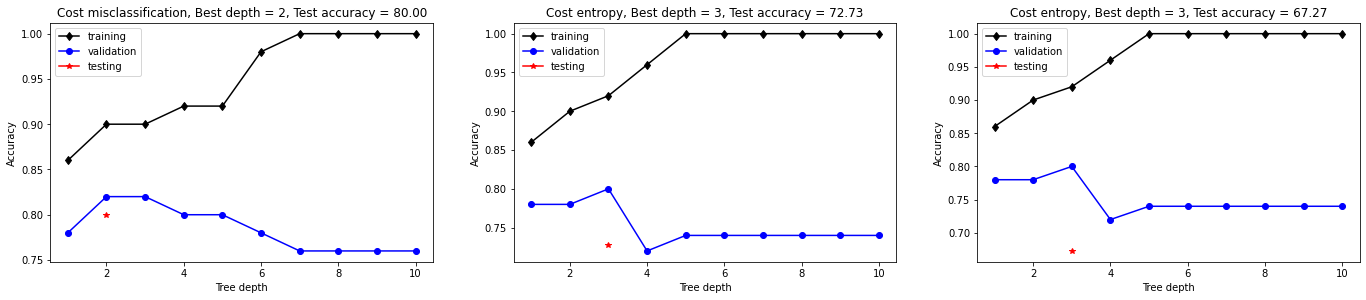

In [ ]:
# further split the training data into 50% training and 50% validation
x_train_tr, y_train_tr = x_train[:50], y_train[:50]
X_train_va, y_train_va = x_train[50:], y_train[50:]

model_choices_mis=[]
train_acc_mis = []
valid_acc_mis = []

model_choices_ent=[]
train_acc_ent = []
valid_acc_ent = []

model_choices_gini=[]
train_acc_gini = []
valid_acc_gini = []

for k in range(1, 11):
    dt = DecisionTree(max_depth=k, cost_fn = cost_misclassification) 

    y_train_tr_prob = dt.fit(x_train_tr, y_train_tr).predict(x_train_tr)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    acc_tr = eva_accuracy(y_train_tr_pred, y_train_tr)/100

    y_train_va_prob = dt.fit(x_train_tr, y_train_tr).predict(X_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = eva_accuracy(y_train_va_pred, y_train_va)/100

    model_choices_mis.append(k)
    train_acc_mis.append(acc_tr)
    valid_acc_mis.append(acc_va)

for k in range(1, 11):
    dt = DecisionTree(max_depth=k, cost_fn = cost_entropy) 

    y_train_tr_prob = dt.fit(x_train_tr, y_train_tr).predict(x_train_tr)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    acc_tr = eva_accuracy(y_train_tr_pred, y_train_tr)/100

    y_train_va_prob = dt.fit(x_train_tr, y_train_tr).predict(X_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = eva_accuracy(y_train_va_pred, y_train_va)/100

    model_choices_ent.append(k)
    train_acc_ent.append(acc_tr)
    valid_acc_ent.append(acc_va)

for k in range(1, 11):
    dt = DecisionTree(max_depth=k, cost_fn = cost_gini_index) 

    y_train_tr_prob = dt.fit(x_train_tr, y_train_tr).predict(x_train_tr)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    acc_tr = eva_accuracy(y_train_tr_pred, y_train_tr)/100

    y_train_va_prob = dt.fit(x_train_tr, y_train_tr).predict(X_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = eva_accuracy(y_train_va_pred, y_train_va)/100

    model_choices_gini.append(k)
    train_acc_gini.append(acc_tr)
    valid_acc_gini.append(acc_va)

# use the best K to predict test data
best_depth_mis = model_choices_mis[valid_acc_mis.index(max(valid_acc_mis))]
best_depth_ent = model_choices_ent[valid_acc_ent.index(max(valid_acc_ent))]
best_depth_gini = model_choices_gini[valid_acc_gini.index(max(valid_acc_gini))]

tree_mis = DecisionTree(max_depth=best_depth_mis, cost_fn = cost_misclassification)
tree_ent = DecisionTree(max_depth=best_depth_ent, cost_fn = cost_entropy)
tree_gini = DecisionTree(max_depth=best_depth_gini, cost_fn = cost_gini_index)

y_test_prob_mis = tree_mis.fit(x_train, y_train).predict(x_test)
y_test_pred_mis = np.argmax(y_test_prob_mis, axis=-1)
test_accuracy_mis = eva_accuracy(y_test_pred_mis,y_test)

y_test_prob_ent = tree_ent.fit(x_train, y_train).predict(x_test)
y_test_pred_ent = np.argmax(y_test_prob_ent, axis=-1)
test_accuracy_ent = eva_accuracy(y_test_pred_ent,y_test)

y_test_prob_gini = tree_gini.fit(x_train, y_train).predict(x_test)
y_test_pred_gini = np.argmax(y_test_prob_gini, axis=-1)
test_accuracy_gini = eva_accuracy(y_test_pred_gini,y_test)


fig, ax = plt.subplots(1, 3, figsize=(20,5))
fig.tight_layout(pad=5.0)

ax[0].set_title(f'Cost misclassification, Best depth = {best_depth_mis}, Test accuracy = {test_accuracy_mis:.2f}')
ax[0].plot(model_choices_mis, train_acc_mis, marker='d', color='black', label='training')
ax[0].plot(model_choices_mis, valid_acc_mis, marker='o', color='blue', label='validation')
ax[0].plot(best_depth_mis, test_accuracy_mis/100, marker='*', color='red', label='testing')
ax[0].set_xlabel("Tree depth")
ax[0].set_ylabel("Accuracy")
ax[0].legend(loc='best')

ax[1].set_title(f'Cost entropy, Best depth = {best_depth_ent}, Test accuracy = {test_accuracy_ent:.2f}')
ax[1].plot(model_choices_ent, train_acc_ent, marker='d', color='black', label='training')
ax[1].plot(model_choices_ent, valid_acc_ent, marker='o', color='blue', label='validation')
ax[1].plot(best_depth_ent, test_accuracy_ent/100, marker='*', color='red', label='testing')
ax[1].set_xlabel("Tree depth")
ax[1].set_ylabel("Accuracy")
ax[1].legend(loc='best')

ax[2].set_title(f'Cost entropy, Best depth = {best_depth_gini}, Test accuracy = {test_accuracy_gini:.2f}')
ax[2].plot(model_choices_gini, train_acc_gini, marker='d', color='black', label='training')
ax[2].plot(model_choices_gini, valid_acc_gini, marker='o', color='blue', label='validation')
ax[2].plot(best_depth_gini, test_accuracy_gini/100, marker='*', color='red', label='testing')
ax[2].set_xlabel("Tree depth")
ax[2].set_ylabel("Accuracy")
ax[2].legend(loc='best')

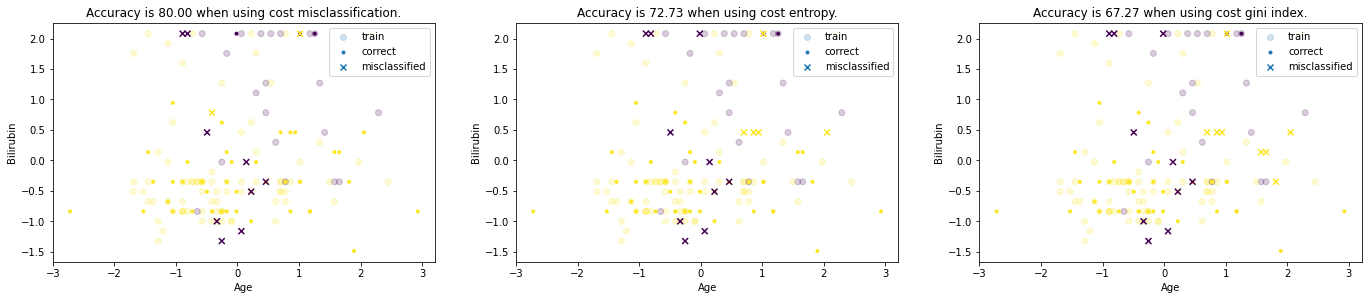

In [ ]:
import matplotlib.pyplot as plt

# fit models using three cost functions
probs_test_mis = tree_mis.fit(x_train, y_train).predict(x_test)
probs_test_ent = tree_ent.fit(x_train, y_train).predict(x_test)
probs_test_gini = tree_gini.fit(x_train, y_train).predict(x_test)

y_pred_mis = np.argmax(probs_test_mis,1)
y_pred_ent = np.argmax(probs_test_ent,1)
y_pred_gini = np.argmax(probs_test_gini,1)

fig, ax = plt.subplots(1, 3,figsize=(20,5))
fig.tight_layout(pad=5.0)
correct_mis = y_test == y_pred_mis
incorrect_mis = np.logical_not(correct_mis)

ax[0].set_title(f'Accuracy is {eva_accuracy(y_pred_mis, y_test):.2f} when using cost misclassification.')
ax[0].scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
ax[0].scatter(x_test[correct_mis,0], x_test[correct_mis,1], marker='.', c=y_pred_mis[correct_mis], label='correct')
ax[0].scatter(x_test[incorrect_mis,0], x_test[incorrect_mis,1], marker='x', c=y_test[incorrect_mis], label='misclassified')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Bilirubin')
ax[0].legend(loc='best')

ax[1].set_title(f'Accuracy is {eva_accuracy(y_pred_ent,y_test):.2f} when using cost entropy.')
correct_ent = y_test == y_pred_ent
incorrect_ent = np.logical_not(correct_ent)
ax[1].scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
ax[1].scatter(x_test[correct_ent,0], x_test[correct_ent,1], marker='.', c=y_pred_ent[correct_ent], label='correct')
ax[1].scatter(x_test[incorrect_ent,0], x_test[incorrect_ent,1], marker='x', c=y_test[incorrect_ent], label='misclassified')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Bilirubin')
ax[1].legend(loc='best')

ax[2].set_title(f'Accuracy is {eva_accuracy(y_pred_gini,y_test):.2f} when using cost gini index.')
correct_gini = y_test == y_pred_gini
incorrect_gini = np.logical_not(correct_gini)
ax[2].scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
ax[2].scatter(x_test[correct_gini,0], x_test[correct_gini,1], marker='.', c=y_pred_gini[correct_gini], label='correct')
ax[2].scatter(x_test[incorrect_gini,0], x_test[incorrect_gini,1], marker='x', c=y_test[incorrect_gini], label='misclassified')
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Bilirubin')
ax[2].legend(loc='best')


In [ ]:
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

Text(940.889705882353, 0.5, 'Bilirubin')

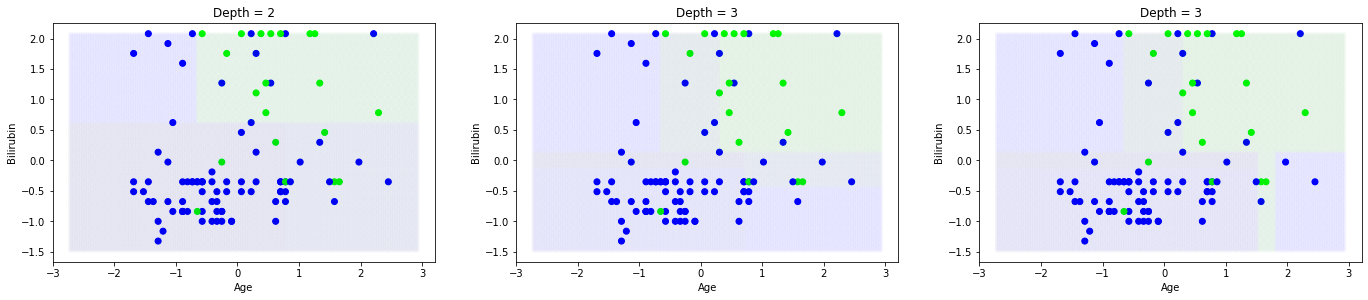

In [ ]:
y_train_prob = np.zeros((y_train.shape[0], num_classes))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

y_prob_all_mis = tree_mis.fit(x_train, y_train).predict(x_all)
y_prob_all_ent = tree_ent.fit(x_train, y_train).predict(x_all)
y_prob_all_gini = tree_gini.fit(x_train, y_train).predict(x_all)

fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.tight_layout(pad=5.0)

ax[0].set_title('Depth = ' + str(best_depth_mis))
ax[0].scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
ax[0].scatter(x_all[:,0], x_all[:,1], c=y_prob_all_mis, marker='.', alpha=.01)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Bilirubin')

ax[1].set_title('Depth = ' + str(best_depth_ent))
ax[1].scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
ax[1].scatter(x_all[:,0], x_all[:,1], c=y_prob_all_ent, marker='.', alpha=.01)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Bilirubin')

ax[2].set_title('Depth = ' + str(best_depth_gini))
ax[2].scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
ax[2].scatter(x_all[:,0], x_all[:,1], c=y_prob_all_gini, marker='.', alpha=.01)
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Bilirubin')

### *Dataset II: messidor_features*

In [ ]:
# feature selection using decision tree importance method
x_me = np.array(mess_df2[['quality_assessment', 'pre-screening','MAs_number_a0.5', 'MAs_number_a0.6', 'MAs_number_a0.7', 
        'MAs_number_a0.8', 'MAs_number_a0.9', 'MAs_number_a1.0', 
        'MAs_number_a0.5_N', 'MAs_number_a0.6_N', 'MAs_number_a0.7_N', 
        'MAs_number_a0.8_N', 'MAs_number_a0.9_N', 'MAs_number_a1.0_N','MAs_number_14_N','MAs_number_15_N',
        'macula_opticdisc_center_distance', 'opticdisc_diameter', 'AM/FM_classification']])

y_me = np.array(mess_df2['class'])

model = DecisionTreeRegressor()
model.fit(x_me, y_me)

importance_me = model.feature_importances_

for i,v in enumerate(importance_me):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00360
Feature: 2, Score: 0.11255
Feature: 3, Score: 0.02263
Feature: 4, Score: 0.02528
Feature: 5, Score: 0.03059
Feature: 6, Score: 0.02532
Feature: 7, Score: 0.07767
Feature: 8, Score: 0.12650
Feature: 9, Score: 0.07096
Feature: 10, Score: 0.05899
Feature: 11, Score: 0.08659
Feature: 12, Score: 0.05227
Feature: 13, Score: 0.02683
Feature: 14, Score: 0.09253
Feature: 15, Score: 0.01105
Feature: 16, Score: 0.07972
Feature: 17, Score: 0.08279
Feature: 18, Score: 0.01414


***Note:***

We also only select best two features for this dataset to better visualze our decision tree.

Based on the UCI Machine Learning webpage description, feature 2-7 are the results of MA detection. So, we select best two features from them: feature 2 (MAs_number_a0.5) and feature 6（MAs_number_a0.9).

Feature 8-15 are normalized feature 2-7, so the best two features from there are the normalized ones from feature: feature 8(MAs_number_a0.5_N) and feature 14 (MAs_number_14_N). 

In [ ]:
# Apply into the dataset
np.random.seed(1234)

feature_cols = ['MAs_number_a0.5','MAs_number_a0.9']
x = np.array(mess_df2[feature_cols])
y = np.array(mess_df2['class'])
(num_instances, num_features), num_classes = x.shape, np.max(y)+2
inds = np.random.permutation(num_instances)

#train-test split)
x_train_me, y_train_me = x[inds[:760]], y[inds[:760]]
x_test_me, y_test_me = x[inds[760:]], y[inds[760:]]

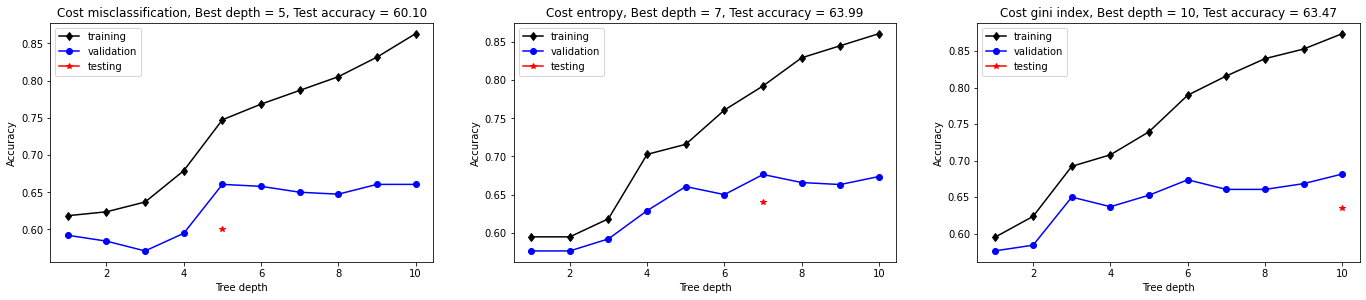

In [ ]:
# further split the training data into 50% training and 50% validation
x_train_tr_me, y_train_tr_me = x_train_me[:380], y_train_me[:380]
x_train_va_me, y_train_va_me = x_train_me[380:], y_train_me[380:]

model_choices_me_mis=[]
train_acc_me_mis = []
valid_acc_me_mis = []

model_choices_me_ent=[]
train_acc_me_ent = []
valid_acc_me_ent = []

model_choices_me_gini=[]
train_acc_me_gini = []
valid_acc_me_gini = []


for k in range(1, 11):
    dt = DecisionTree(max_depth=k, cost_fn = cost_misclassification) 

    y_train_tr_prob_me = dt.fit(x_train_tr_me, y_train_tr_me).predict(x_train_tr_me)
    y_train_tr_pred_me = np.argmax(y_train_tr_prob_me, axis=-1)
    acc_tr_me = eva_accuracy(y_train_tr_pred_me, y_train_tr_me)/100

    y_train_va_prob_me = dt.fit(x_train_tr_me, y_train_tr_me).predict(x_train_va_me)
    y_train_va_pred_me = np.argmax(y_train_va_prob_me, axis=-1)
    acc_va_me = eva_accuracy(y_train_va_pred_me, y_train_va_me)/100

    model_choices_me_mis.append(k)
    train_acc_me_mis.append(acc_tr_me)
    valid_acc_me_mis.append(acc_va_me)

for k in range(1, 11):
    dt = DecisionTree(max_depth=k, cost_fn = cost_entropy) 

    y_train_tr_prob_me = dt.fit(x_train_tr_me, y_train_tr_me).predict(x_train_tr_me)
    y_train_tr_pred_me = np.argmax(y_train_tr_prob_me, axis=-1)
    acc_tr_me = eva_accuracy(y_train_tr_pred_me, y_train_tr_me)/100

    y_train_va_prob_me = dt.fit(x_train_tr_me, y_train_tr_me).predict(x_train_va_me)
    y_train_va_pred_me = np.argmax(y_train_va_prob_me, axis=-1)
    acc_va_me = eva_accuracy(y_train_va_pred_me, y_train_va_me)/100

    model_choices_me_ent.append(k)
    train_acc_me_ent.append(acc_tr_me)
    valid_acc_me_ent.append(acc_va_me)

for k in range(1, 11):
    dt = DecisionTree(max_depth=k, cost_fn = cost_gini_index) 

    y_train_tr_prob_me = dt.fit(x_train_tr_me, y_train_tr_me).predict(x_train_tr_me)
    y_train_tr_pred_me = np.argmax(y_train_tr_prob_me, axis=-1)
    acc_tr_me = eva_accuracy(y_train_tr_pred_me, y_train_tr_me)/100

    y_train_va_prob_me = dt.fit(x_train_tr_me, y_train_tr_me).predict(x_train_va_me)
    y_train_va_pred_me = np.argmax(y_train_va_prob_me, axis=-1)
    acc_va_me = eva_accuracy(y_train_va_pred_me, y_train_va_me)/100

    model_choices_me_gini.append(k)
    train_acc_me_gini.append(acc_tr_me)
    valid_acc_me_gini.append(acc_va_me)

# use the best K to predict test data
best_depth_me_mis = model_choices_me_mis[valid_acc_me_mis.index(max(valid_acc_me_mis))]
best_depth_me_ent = model_choices_me_ent[valid_acc_me_ent.index(max(valid_acc_me_ent))]
best_depth_me_gini = model_choices_me_gini[valid_acc_me_gini.index(max(valid_acc_me_gini))]

tree_mis = DecisionTree(max_depth=best_depth_me_mis, cost_fn = cost_misclassification)
tree_ent = DecisionTree(max_depth=best_depth_me_ent, cost_fn = cost_entropy)
tree_gini = DecisionTree(max_depth=best_depth_me_gini, cost_fn = cost_gini_index)

y_test_prob_me_mis = tree_mis.fit(x_train_me, y_train_me).predict(x_test_me)
y_test_prob_me_ent = tree_ent.fit(x_train_me, y_train_me).predict(x_test_me)
y_test_prob_me_gini = tree_gini.fit(x_train_me, y_train_me).predict(x_test_me)

y_test_pred_me_mis = np.argmax(y_test_prob_me_mis, axis=-1)
y_test_pred_me_ent = np.argmax(y_test_prob_me_ent, axis=-1)
y_test_pred_me_gini = np.argmax(y_test_prob_me_gini, axis=-1)

test_accuracy_me_mis = eva_accuracy(y_test_pred_me_mis,y_test_me)
test_accuracy_me_ent = eva_accuracy(y_test_pred_me_ent,y_test_me)
test_accuracy_me_gini = eva_accuracy(y_test_pred_me_gini,y_test_me)

fig, ax = plt.subplots(1, 3, figsize=(20,5))
fig.tight_layout(pad=5.0)

ax[0].set_title(f'Cost misclassification, Best depth = {best_depth_me_mis}, Test accuracy = {test_accuracy_me_mis:.2f}')
ax[0].plot(model_choices_me_mis, train_acc_me_mis, marker='d', color='black', label='training')
ax[0].plot(model_choices_me_mis, valid_acc_me_mis, marker='o', color='blue', label='validation')
ax[0].plot(best_depth_me_mis, test_accuracy_me_mis/100, marker='*', color='red', label='testing')
ax[0].set_xlabel("Tree depth")
ax[0].set_ylabel("Accuracy")
ax[0].legend(loc='best')

ax[1].set_title(f'Cost entropy, Best depth = {best_depth_me_ent}, Test accuracy = {test_accuracy_me_ent:.2f}')
ax[1].plot(model_choices_me_ent, train_acc_me_ent, marker='d', color='black', label='training')
ax[1].plot(model_choices_me_ent, valid_acc_me_ent, marker='o', color='blue', label='validation')
ax[1].plot(best_depth_me_ent, test_accuracy_me_ent/100, marker='*', color='red', label='testing')
ax[1].set_xlabel("Tree depth")
ax[1].set_ylabel("Accuracy")
ax[1].legend(loc='best')

ax[2].set_title(f'Cost gini index, Best depth = {best_depth_me_gini}, Test accuracy = {test_accuracy_me_gini:.2f}')
ax[2].plot(model_choices_me_gini, train_acc_me_gini, marker='d', color='black', label='training')
ax[2].plot(model_choices_me_gini, valid_acc_me_gini, marker='o', color='blue', label='validation')
ax[2].plot(best_depth_me_gini, test_accuracy_me_gini/100, marker='*', color='red', label='testing')
ax[2].set_xlabel("Tree depth")
ax[2].set_ylabel("Accuracy")
ax[2].legend(loc='best')

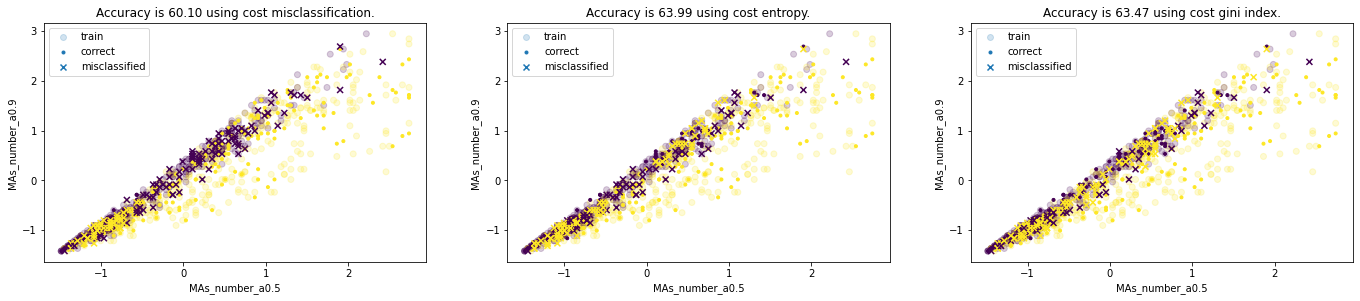

In [ ]:
# fit models using three cost functions
probs_test_me_mis = tree_mis.fit(x_train_me, y_train_me).predict(x_test_me)
probs_test_me_ent = tree_ent.fit(x_train_me, y_train_me).predict(x_test_me)
probs_test_me_gini = tree_gini.fit(x_train_me, y_train_me).predict(x_test_me)

y_pred_me_mis = np.argmax(probs_test_me_mis,1)
y_pred_me_ent = np.argmax(probs_test_me_ent,1)
y_pred_me_gini = np.argmax(probs_test_me_gini,1)

fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.tight_layout(pad=5.0)

correct_me_mis = y_test_me == y_pred_me_mis
incorrect_me_mis = np.logical_not(correct_me_mis)
ax[0].set_title(f'Accuracy is {eva_accuracy(y_pred_me_mis, y_test_me):.2f} using cost misclassification.')
ax[0].scatter(x_train_me[:,0], x_train_me[:,1], c=y_train_me, marker='o', alpha=.2, label='train')
ax[0].scatter(x_test_me[correct_me_mis,0], x_test_me[correct_me_mis,1], marker='.', c=y_pred_me_mis[correct_me_mis], label='correct')
ax[0].scatter(x_test_me[incorrect_me_mis,0], x_test_me[incorrect_me_mis,1], marker='x', c=y_test_me[incorrect_me_mis], label='misclassified')
ax[0].set_ylabel('MAs_number_a0.9')
ax[0].set_xlabel('MAs_number_a0.5')
ax[0].legend(loc='best')


correct_me_ent = y_test_me == y_pred_me_ent
incorrect_me_ent = np.logical_not(correct_me_ent)
ax[1].set_title(f'Accuracy is {eva_accuracy(y_pred_me_ent,y_test_me):.2f} using cost entropy.')
ax[1].scatter(x_train_me[:,0], x_train_me[:,1], c=y_train_me, marker='o', alpha=.2, label='train')
ax[1].scatter(x_test_me[correct_me_ent,0], x_test_me[correct_me_ent,1], marker='.', c=y_pred_me_ent[correct_me_ent], label='correct')
ax[1].scatter(x_test_me[incorrect_me_ent,0], x_test_me[incorrect_me_ent,1], marker='x', c=y_test_me[incorrect_me_ent], label='misclassified')
ax[1].set_ylabel('MAs_number_a0.9')
ax[1].set_xlabel('MAs_number_a0.5')
ax[1].legend(loc='best')

correct_me_gini = y_test_me == y_pred_me_gini
incorrect_me_gini = np.logical_not(correct_me_gini)
ax[2].set_title(f'Accuracy is {eva_accuracy(y_pred_me_gini,y_test_me):.2f} using cost gini index.')
ax[2].scatter(x_train_me[:,0], x_train_me[:,1], c=y_train_me, marker='o', alpha=.2, label='train')
ax[2].scatter(x_test_me[correct_me_gini,0], x_test_me[correct_me_gini,1], marker='.', c=y_pred_me_gini[correct_me_gini], label='correct')
ax[2].scatter(x_test_me[incorrect_me_gini,0], x_test_me[incorrect_me_gini,1], marker='x', c=y_test_me[incorrect_me_gini], label='misclassified')
ax[2].set_ylabel('MAs_number_a0.9')
ax[2].set_xlabel('MAs_number_a0.5')
ax[2].legend(loc='best')

Text(0.5, 24.0, 'MAs_number_a0.5')

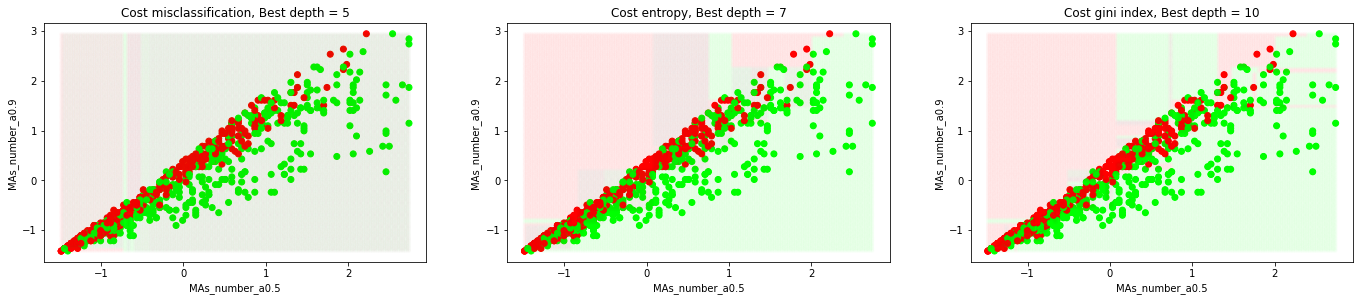

In [ ]:
# decision boundaries
x0v_me = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v_me = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0_me,x1_me = np.meshgrid(x0v_me, x1v_me)
x_all_me = np.vstack((x0_me.ravel(),x1_me.ravel())).T
z_me = np.zeros((40000,1))


y_train_prob_me = np.zeros((y_train_me.shape[0], num_classes))
y_train_prob_me[np.arange(y_train_me.shape[0]), y_train_me] = 1


y_prob_all_me_mis = np.append(tree_mis.fit(x_train_me, y_train_me).predict(x_all_me), z_me, axis = 1)
y_prob_all_me_ent = np.append(tree_ent.fit(x_train_me, y_train_me).predict(x_all_me),z_me, axis = 1)
y_prob_all_me_gini = np.append(tree_gini.fit(x_train_me, y_train_me).predict(x_all_me), z_me, axis = 1)

fig, ax = plt.subplots(1, 3,figsize=(20,5))
fig.tight_layout(pad=5.0)

ax[0].set_title('Cost misclassification, Best depth = ' + str(best_depth_me_mis))
ax[0].scatter(x_train_me[:,0], x_train_me[:,1], c=y_train_prob_me, marker='o', alpha=1)
ax[0].scatter(x_all_me[:,0], x_all_me[:,1], c=y_prob_all_me_mis, marker='.', alpha=.01)
ax[0].set_ylabel('MAs_number_a0.9')
ax[0].set_xlabel('MAs_number_a0.5')

ax[1].set_title('Cost entropy, Best depth = ' + str(best_depth_me_ent))
ax[1].scatter(x_train_me[:,0], x_train_me[:,1], c=y_train_prob_me, marker='o', alpha=1)
ax[1].scatter(x_all_me[:,0], x_all_me[:,1], c=y_prob_all_me_ent, marker='.', alpha=.01)
ax[1].set_ylabel('MAs_number_a0.9')
ax[1].set_xlabel('MAs_number_a0.5')

ax[2].set_title('Cost gini index, Best depth = ' + str(best_depth_me_gini))
ax[2].scatter(x_train_me[:,0], x_train_me[:,1], c=y_train_prob_me, marker='o', alpha=1)
ax[2].scatter(x_all_me[:,0], x_all_me[:,1], c=y_prob_all_me_gini, marker='.', alpha=.01)
ax[2].set_ylabel('MAs_number_a0.9')
ax[2].set_xlabel('MAs_number_a0.5')


**Note:**

Code to contruct models in Task 2 and code to plot prediction and boundaries in Task 3 are based on the colab materials from COMP551.

Link: https://colab.research.google.com/github/yueliyl/comp551-notebooks/blob/master/DecisionTree.ipynb

Code to select important features using Decision Tree Feature Importance Method is based on the strategy below.

Link: https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [ ]:
################################End of DT##################################

# **KNN:** Task 2 & 3

### *dataset I: hepatitis_data*

In [ ]:
col_missing_value = ['Liver Big', 'Liver Firm', 'Alk Phosphate', 'Albumin', 'Protime']
hepa_df_knn = hepa_df_knn.drop(col_missing_value, axis = 1)

In [ ]:
hepa_array = hepa_df_knn.values
hepa_array = hepa_array.astype(float)
hepa_array

array([[ 2.        , -0.8913026 ,  2.        , ..., -0.35396088,
        -1.07399255,  1.        ],
       [ 2.        ,  0.70030918,  1.        , ..., -0.51628021,
        -0.61508464,  1.        ],
       [ 2.        ,  2.92856567,  1.        , ..., -0.84091889,
        -0.80629627,  1.        ],
       ...,
       [ 2.        ,  1.57569566,  1.        , ..., -0.67859955,
        -1.03575022,  2.        ],
       [ 2.        ,  0.93905095,  2.        , ...,  0.45763581,
        -1.05487138,  2.        ],
       [ 1.        ,  0.14324506,  1.        , ..., -0.0293222 ,
        -1.05487138,  2.        ]])

In [ ]:
# Feature selection
# from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

def select_features(X_train, y_train, X_test):
  # configure to select all features
  fs = SelectKBest(score_func=f_regression, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

x_feature_select, y_feature_select = hepa_array[:, 1:], hepa_array[:, 0]
# y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(x_feature_select, y_feature_select, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

  # plot the scores
  # pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
  # pyplot.show()

Feature 0: 5.514627
Feature 1: 3.038425
Feature 2: 3.716569
Feature 3: 2.262096
Feature 4: 8.189440
Feature 5: 7.163380
Feature 6: 1.482589
Feature 7: 13.432070
Feature 8: 31.103122
Feature 9: 26.575522
Feature 10: 19.403753
Feature 11: 26.826516
Feature 12: 0.285613
Feature 13: 15.430414


In [ ]:
hepa_df_knn

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Sgot,Histology
0,2,-0.891303,2,1,2,2,2,2,2,2,2,2,-0.353961,-1.073993,1
1,2,0.700309,1,1,2,1,2,2,2,2,2,2,-0.516280,-0.615085,1
2,2,2.928566,1,2,2,1,2,2,2,2,2,2,-0.840919,-0.806296,1
3,2,-0.811722,1,2,1,2,2,2,2,2,2,2,-0.840919,-0.423873,1
4,2,-0.572980,1,2,2,2,2,2,2,2,2,2,-0.353961,2.061878,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,0.381987,1,2,2,1,1,1,2,1,1,1,2.080829,2.061878,2
151,2,0.222826,1,2,2,1,2,2,2,2,2,2,-0.516280,1.297032,2
152,2,1.575696,1,1,2,1,1,2,2,1,2,2,-0.678600,-1.035750,2
153,2,0.939051,2,1,2,1,2,2,1,1,2,1,0.457636,-1.054871,2


In [ ]:
# Feature 11: Bilirubin, feature 1: Age  
x, y = hepa_array[:, [12, 1]], hepa_array[:, 0]
y = y.astype(int)

In [ ]:
(N,D), C = x.shape, np.max(y)+2

#generates an indices array from 0 to N-1 and permutes it
hepa_array = np.random.permutation(N) 

print(N, D, C)

155 2 4


In [ ]:
#split the dataset into train and test
x_train, y_train = x[hepa_array[:124]], y[hepa_array[:124]]
x_test, y_test = x[hepa_array[124:]], y[hepa_array[124:]]

**KNN - distance**

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

**Euclidean distance**

In [ ]:
class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 2
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        # self.x is in shape (100, 2), x_test is in shape (50, 2)
        # self.x[None, :, :] is in shape (1, 100, 2), and x_test[:,None,:] is in shape (50, 1, 2)
        # result: (x_test.shape[0], self.x.shape[0])
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            # print(i)
            knns[i,:] = np.argsort(distances[i])[:self.K]
            # print(knns[i,:])
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

knns shape: (31, 1)
y_prob shape: (31, 4)
accuracy is 74.2.


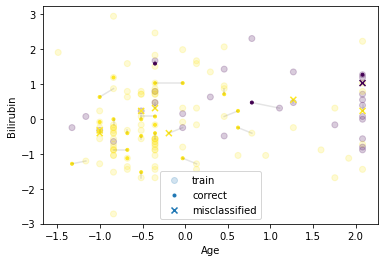

In [ ]:
myK = 1

model = KNN(K=myK)

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
        hor = x_test[i,0], x_train[knns[i,k],0]
        ver = x_test[i,1], x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel('Bilirubin')
plt.xlabel('Age')
plt.legend()
# plt.savefig('Hepa_KNN'+str(myK)+'.png',dpi=300,bbox_inches='tight')
# plt.show()

1
accuracy: 74.2.
5
accuracy: 90.3.
15
accuracy: 87.1.


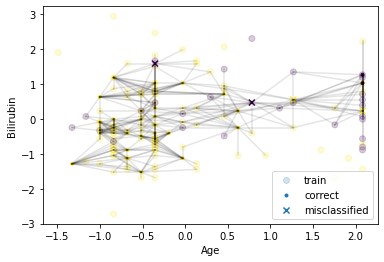

In [ ]:
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

# print(np.min(x[:,0]))
# print(np.max(x[:,0]))
# print(np.min(x[:,1]))
# print(np.max(x[:,1]))

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in [1, 5, 15]:
    print(k)
    model = KNN(K=k)

    y_train_prob = np.zeros((y_train.shape[0], C))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
    
    y_prob, knns = model.fit(x_train, y_train).predict(x_test)
    y_pred = np.argmax(y_prob,axis=-1)    
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)    
    
    y_pred = np.argmax(y_prob,axis=-1)
    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    acc = f'accuracy: {accuracy*100:.1f}.'
    print(acc)
    

    #to get class probability of all the points in the 2D grid
    y_prob_all, _ = model.fit(x_train, y_train).predict(x_all)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    
    
    plt.clf()
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
#     plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
#     plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
#     plt.scatter(x_test[:,0], x_test[:,1], c=y_pred, marker='s')
#     plt.savefig('prediction_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight')
    
    plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
    plt.ylabel('Bilirubin')
    plt.xlabel('Age')
#    plt.savefig('decision_boundaries_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight') 
    
    
    #connect each node to k-nearest neighbours in the training set
    #visualization of the points
    plt.clf()
    
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
    plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
    plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

    for i in range(x_test.shape[0]):
        for myk in range(model.K):
            hor = x_test[i,0], x_train[knns[i,myk],0]
            ver = x_test[i,1], x_train[knns[i,myk],1]
            plt.plot(hor, ver, 'k-', alpha=.1)

    plt.ylabel('Bilirubin')
    plt.xlabel('Age')
    plt.legend()
#   plt.savefig('iris_KNN'+str(k)+'.png',dpi=300,bbox_inches='tight') 

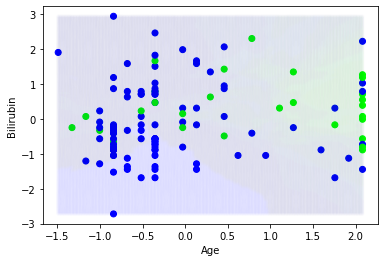

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.01)
plt.ylabel('Bilirubin')
plt.xlabel('Age')
plt.show()

best K = 6, test accuracy = 0.8709677419354839


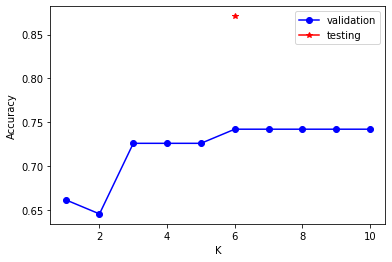

In [ ]:
# further split the training data into 50% training and 50% validation
x_train_tr, y_train_tr = x_train[:62], y_train[:62]
x_train_va, y_train_va = x_train[62:], y_train[62:]

model_choices=[]
valid_acc = []

n_valid = y_train_va.shape[0]

for k in range(1,11):
    knn = KNN(K=k) # create a KNN object (OOP)
    # y_train_va_prob,_ = knn.fit(x_train, y_train).predict(x_train_va) # wrong
    y_train_va_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va) # bug fixed
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy = np.sum(y_train_va_pred == y_train_va)/n_valid
    model_choices.append(k)
    valid_acc.append(accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob,_ = knn.fit(x_train, y_train).predict(x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
# plt.savefig('iris_KNN_chooseK.png',dpi=300,bbox_inches='tight')

In [ ]:
def eva_accuracy (y_pred, y_test):
  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  return accuracy * 100

In [ ]:
# Use the best k to fit the model and calculate accuracy
model = KNN(K=best_valid_K)

y_train_prob = np.zeros((y_train.shape[0], C))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
    
y_prob, knns = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)    
correct = y_test == y_pred
incorrect = np.logical_not(correct)    
    
print(eva_accuracy(y_pred, y_test))

87.09677419354838


**Manhattan distance**

In [ ]:
class KNN:

    def __init__(self, K=1, dist_fn= manhattan):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 2
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        # self.x is in shape (100, 2), x_test is in shape (50, 2)
        # self.x[None, :, :] is in shape (1, 100, 2), and x_test[:,None,:] is in shape (50, 1, 2)
        # result: (x_test.shape[0], self.x.shape[0])
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            # print(i)
            knns[i,:] = np.argsort(distances[i])[:self.K]
            # print(knns[i,:])
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

knns shape: (31, 1)
y_prob shape: (31, 4)
accuracy is 77.4.


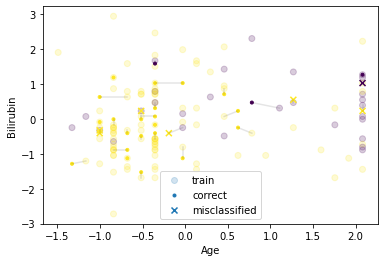

In [ ]:
myK = 1

model = KNN(K=myK)

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
        hor = x_test[i,0], x_train[knns[i,k],0]
        ver = x_test[i,1], x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel('Bilirubin')
plt.xlabel('Age')
plt.legend()
# plt.savefig('Hepa_KNN'+str(myK)+'.png',dpi=300,bbox_inches='tight')
# plt.show()

1
accuracy: 77.4.
5
accuracy: 90.3.
15
accuracy: 87.1.


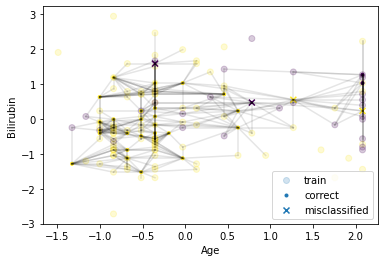

In [ ]:
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

# print(np.min(x[:,0]))
# print(np.max(x[:,0]))
# print(np.min(x[:,1]))
# print(np.max(x[:,1]))

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in [1, 5, 15]:
    print(k)
    model = KNN(K=k)

    y_train_prob = np.zeros((y_train.shape[0], C))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
    
    y_prob, knns = model.fit(x_train, y_train).predict(x_test)
    y_pred = np.argmax(y_prob,axis=-1)    
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)    
    
    y_pred = np.argmax(y_prob,axis=-1)
    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    acc = f'accuracy: {accuracy*100:.1f}.'
    print(acc)
    

    #to get class probability of all the points in the 2D grid
    y_prob_all, _ = model.fit(x_train, y_train).predict(x_all)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    
    
    plt.clf()
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
#     plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
#     plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
#     plt.scatter(x_test[:,0], x_test[:,1], c=y_pred, marker='s')
#     plt.savefig('prediction_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight')
    
    plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
    plt.ylabel('Bilirubin')
    plt.xlabel('Age')
#    plt.savefig('decision_boundaries_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight') 
    
    
    #connect each node to k-nearest neighbours in the training set
    #visualization of the points
    plt.clf()
    
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
    plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
    plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

    for i in range(x_test.shape[0]):
        for myk in range(model.K):
            hor = x_test[i,0], x_train[knns[i,myk],0]
            ver = x_test[i,1], x_train[knns[i,myk],1]
            plt.plot(hor, ver, 'k-', alpha=.1)

    plt.ylabel('Bilirubin')
    plt.xlabel('Age')
    plt.legend()
#   plt.savefig('iris_KNN'+str(k)+'.png',dpi=300,bbox_inches='tight') 

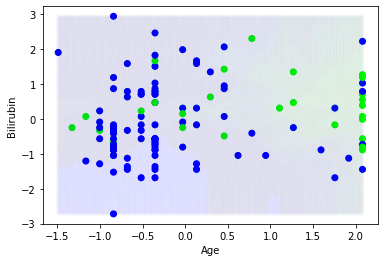

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.01)
plt.ylabel('Bilirubin')
plt.xlabel('Age')
plt.show()

best K = 3, test accuracy = 0.8709677419354839


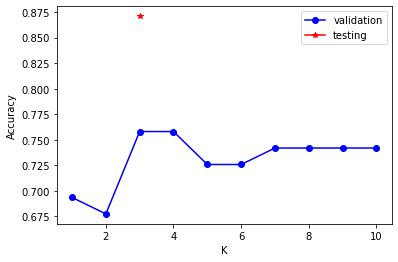

In [ ]:
# further split the training data into 50% training and 50% validation
x_train_tr, y_train_tr = x_train[:62], y_train[:62]
x_train_va, y_train_va = x_train[62:], y_train[62:]

model_choices=[]
valid_acc = []

n_valid = y_train_va.shape[0]

for k in range(1,11):
    knn = KNN(K=k) # create a KNN object (OOP)
    # y_train_va_prob,_ = knn.fit(x_train, y_train).predict(x_train_va) # wrong
    y_train_va_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va) # bug fixed
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy = np.sum(y_train_va_pred == y_train_va)/n_valid
    model_choices.append(k)
    valid_acc.append(accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob,_ = knn.fit(x_train, y_train).predict(x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
# plt.savefig('iris_KNN_chooseK.png',dpi=300,bbox_inches='tight')

In [ ]:
def eva_accuracy (y_pred, y_test):
  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  return accuracy * 100

In [ ]:
# Use the best k to fit the model and calculate accuracy
model = KNN(K=best_valid_K)

y_train_prob = np.zeros((y_train.shape[0], C))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
    
y_prob, knns = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)    
correct = y_test == y_pred
incorrect = np.logical_not(correct)    
    
print(eva_accuracy(y_pred, y_test))

87.09677419354838


### *Dataset II: messidor_features*

In [ ]:
mess_array = mess_df.values
mess_array

array([[ 1.      ,  1.      , 22.      , ...,  0.100025,  1.      ,
         0.      ],
       [ 1.      ,  1.      , 24.      , ...,  0.144414,  0.      ,
         0.      ],
       [ 1.      ,  1.      , 62.      , ...,  0.128548,  0.      ,
         1.      ],
       ...,
       [ 1.      ,  0.      , 49.      , ...,  0.129843,  0.      ,
         0.      ],
       [ 1.      ,  1.      , 39.      , ...,  0.10669 ,  1.      ,
         1.      ],
       [ 1.      ,  1.      ,  7.      , ...,  0.088957,  0.      ,
         0.      ]])

In [ ]:
mess_df[0:18]

,quality_assessment,pre-screening,MAs_number_a0.5,MAs_number_a0.6,MAs_number_a0.7,MAs_number_a0.8,MAs_number_a0.9,MAs_number_a1.0,MAs_number_a0.5_N,MAs_number_a0.6_N,MAs_number_a0.7_N,MAs_number_a0.8_N,MAs_number_a0.9_N,MAs_number_a1.0_N,MAs_number_14_N,MAs_number_15_N,macula_opticdisc_center_distance,opticdisc_diameter,AM/FM_classification,class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
6,1,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0,1
7,1,1,6,6,6,6,2,1,20.679649,9.497786,1.223660,0.150382,0.000000,0.000000,0.000000,0.000000,0.576318,0.071071,1,0
8,1,1,22,21,18,15,13,10,66.691933,23.545543,6.151117,0.496372,0.000000,0.000000,0.000000,0.000000,0.500073,0.116793,0,1
9,1,1,79,75,73,71,64,47,22.141784,10.054384,0.874633,0.099780,0.023386,0.000000,0.000000,0.000000,0.560959,0.109134,0,1


In [ ]:
# Feature selection

def select_features(X_train, y_train, X_test):
  # configure to select all features
  fs = SelectKBest(score_func=f_regression, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

x_feature_select, y_feature_select = mess_array[:, :19], mess_array[:, 19]
# y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(x_feature_select, y_feature_select, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

  # plot the scores
  # pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
  # pyplot.show()

Feature 0: 1.147853
Feature 1: 4.095590
Feature 2: 76.166936
Feature 3: 62.456720
Feature 4: 47.687569
Feature 5: 34.703105
Feature 6: 22.710884
Feature 7: 15.239846
Feature 8: 2.354646
Feature 9: 0.011121
Feature 10: 0.422352
Feature 11: 7.130635
Feature 12: 17.030137
Feature 13: 19.806198
Feature 14: 30.587177
Feature 15: 28.172675
Feature 16: 0.055048
Feature 17: 0.668236
Feature 18: 1.279094


In [ ]:
x, y = mess_array[:, [3,4]], mess_array[:, 19]
y = y.astype(int)

In [ ]:
(N,D), C = x.shape, np.max(y)+2

#generates an indices array from 0 to N-1 and permutes it
mess_array = np.random.permutation(N) 

print(N, D, C)

1151 2 3


In [ ]:
#split the dataset into train and test
x_train, y_train = x[mess_array[:920]], y[mess_array[:920]]
x_test, y_test = x[mess_array[920:]], y[mess_array[920:]]

**KNN - distance**

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

**Euclidean distance**

In [ ]:
class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 2
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        # self.x is in shape (100, 2), x_test is in shape (50, 2)
        # self.x[None, :, :] is in shape (1, 100, 2), and x_test[:,None,:] is in shape (50, 1, 2)
        # result: (x_test.shape[0], self.x.shape[0])
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            # print(i)
            knns[i,:] = np.argsort(distances[i])[:self.K]
            # print(knns[i,:])
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

knns shape: (231, 1)
y_prob shape: (231, 3)
accuracy is 68.0.


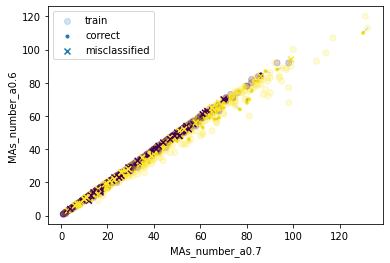

In [ ]:
myK = 1

model = KNN(K=myK)

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
        hor = x_test[i,0], x_train[knns[i,k],0]
        ver = x_test[i,1], x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel('MAs_number_a0.6')
plt.xlabel('MAs_number_a0.7')
plt.legend()
# plt.savefig('Hepa_KNN'+str(myK)+'.png',dpi=300,bbox_inches='tight')
# plt.show()

1
accuracy: 68.0.
5
accuracy: 63.6.
15
accuracy: 65.8.


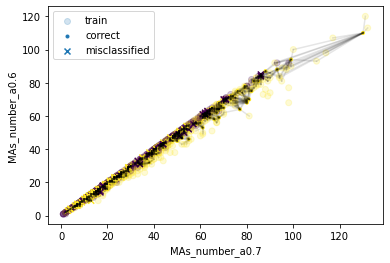

In [ ]:
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

# print(np.min(x[:,0]))
# print(np.max(x[:,0]))
# print(np.min(x[:,1]))
# print(np.max(x[:,1]))

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in [1, 5, 15]:
    print(k)
    model = KNN(K=k)

    y_train_prob = np.zeros((y_train.shape[0], C))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
    
    y_prob, knns = model.fit(x_train, y_train).predict(x_test)
    y_pred = np.argmax(y_prob,axis=-1)    
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)    
    
    y_pred = np.argmax(y_prob,axis=-1)
    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    acc = f'accuracy: {accuracy*100:.1f}.'
    print(acc)
    

    #to get class probability of all the points in the 2D grid
    y_prob_all, _ = model.fit(x_train, y_train).predict(x_all)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    
    
    plt.clf()
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
#     plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
#     plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
#     plt.scatter(x_test[:,0], x_test[:,1], c=y_pred, marker='s')
#     plt.savefig('prediction_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight')
    
    plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
    plt.ylabel('MAs_number_a0.6')
    plt.xlabel('MAs_number_a0.7')
  # plt.savefig('decision_boundaries_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight') 
    
    
    #connect each node to k-nearest neighbours in the training set
    #visualization of the points
    plt.clf()
    
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
    plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
    plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

    for i in range(x_test.shape[0]):
        for myk in range(model.K):
            hor = x_test[i,0], x_train[knns[i,myk],0]
            ver = x_test[i,1], x_train[knns[i,myk],1]
            plt.plot(hor, ver, 'k-', alpha=.1)

    plt.ylabel('MAs_number_a0.6')
    plt.xlabel('MAs_number_a0.7')
    plt.legend()
  # plt.savefig('iris_KNN'+str(k)+'.png',dpi=300,bbox_inches='tight') 

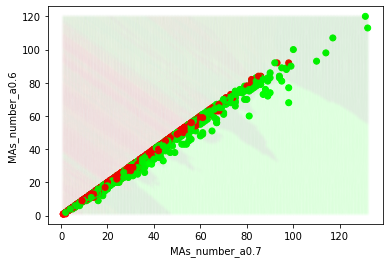

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.01)
plt.ylabel('MAs_number_a0.6')
plt.xlabel('MAs_number_a0.7')
plt.show()

best K = 9, test accuracy = 0.6536796536796536


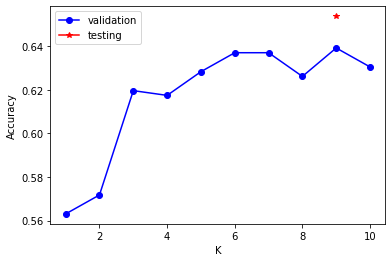

In [ ]:
# further split the training data into 50% training and 50% validation
x_train_tr, y_train_tr = x_train[:460], y_train[:460]
x_train_va, y_train_va = x_train[460:], y_train[460:]

model_choices=[]
valid_acc = []

n_valid = y_train_va.shape[0]

for k in range(1,11):
    knn = KNN(K=k) # create a KNN object (OOP)
    # y_train_va_prob,_ = knn.fit(x_train, y_train).predict(x_train_va) # wrong
    y_train_va_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va) # bug fixed
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy = np.sum(y_train_va_pred == y_train_va)/n_valid
    model_choices.append(k)
    valid_acc.append(accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob,_ = knn.fit(x_train, y_train).predict(x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
# plt.savefig('iris_KNN_chooseK.png',dpi=300,bbox_inches='tight')

In [ ]:
def eva_accuracy (y_pred, y_test):
  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  return accuracy * 100

In [ ]:
# Use the best k to fit the model and calculate accuracy
model = KNN(K=best_valid_K)

y_train_prob = np.zeros((y_train.shape[0], C))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
    
y_prob, knns = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)    
correct = y_test == y_pred
incorrect = np.logical_not(correct)    
    
print(eva_accuracy(y_pred, y_test))

65.36796536796537


**Manhattan distance**

In [ ]:
class KNN:

    def __init__(self, K=1, dist_fn= manhattan):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 2
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        # self.x is in shape (100, 2), x_test is in shape (50, 2)
        # self.x[None, :, :] is in shape (1, 100, 2), and x_test[:,None,:] is in shape (50, 1, 2)
        # result: (x_test.shape[0], self.x.shape[0])
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            # print(i)
            knns[i,:] = np.argsort(distances[i])[:self.K]
            # print(knns[i,:])
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

knns shape: (231, 1)
y_prob shape: (231, 3)
accuracy is 60.2.


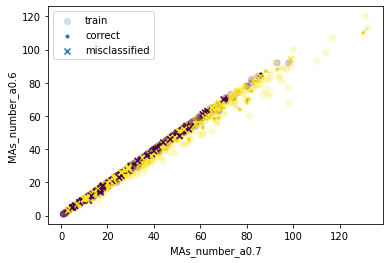

In [ ]:
myK = 1

model = KNN(K=myK)

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
        hor = x_test[i,0], x_train[knns[i,k],0]
        ver = x_test[i,1], x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel('MAs_number_a0.6')
plt.xlabel('MAs_number_a0.7')
plt.legend()
# plt.savefig('Hepa_KNN'+str(myK)+'.png',dpi=300,bbox_inches='tight')
# plt.show()

1
accuracy: 60.2.
5
accuracy: 65.4.
15
accuracy: 64.9.


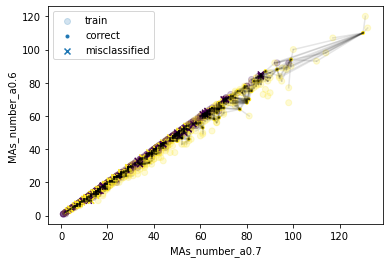

In [ ]:
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

# print(np.min(x[:,0]))
# print(np.max(x[:,0]))
# print(np.min(x[:,1]))
# print(np.max(x[:,1]))

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in [1, 5, 15]:
    print(k)
    model = KNN(K=k)

    y_train_prob = np.zeros((y_train.shape[0], C))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
    
    y_prob, knns = model.fit(x_train, y_train).predict(x_test)
    y_pred = np.argmax(y_prob,axis=-1)    
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)    
    
    y_pred = np.argmax(y_prob,axis=-1)
    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    acc = f'accuracy: {accuracy*100:.1f}.'
    print(acc)
    

    #to get class probability of all the points in the 2D grid
    y_prob_all, _ = model.fit(x_train, y_train).predict(x_all)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    
    
    plt.clf()
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
#     plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
#     plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
#     plt.scatter(x_test[:,0], x_test[:,1], c=y_pred, marker='s')
#     plt.savefig('prediction_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight')
    
    plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
    plt.ylabel('MAs_number_a0.6')
    plt.xlabel('MAs_number_a0.7')
  # plt.savefig('decision_boundaries_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight') 
    
    
    #connect each node to k-nearest neighbours in the training set
    #visualization of the points
    plt.clf()
    
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
    plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
    plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

    for i in range(x_test.shape[0]):
        for myk in range(model.K):
            hor = x_test[i,0], x_train[knns[i,myk],0]
            ver = x_test[i,1], x_train[knns[i,myk],1]
            plt.plot(hor, ver, 'k-', alpha=.1)

    plt.ylabel('MAs_number_a0.6')
    plt.xlabel('MAs_number_a0.7')
    plt.legend()
  # plt.savefig('iris_KNN'+str(k)+'.png',dpi=300,bbox_inches='tight') 

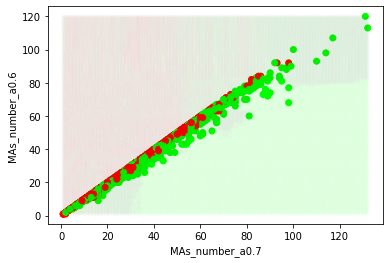

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.01)
plt.ylabel('MAs_number_a0.6')
plt.xlabel('MAs_number_a0.7')
plt.show()

best K = 9, test accuracy = 0.6406926406926406


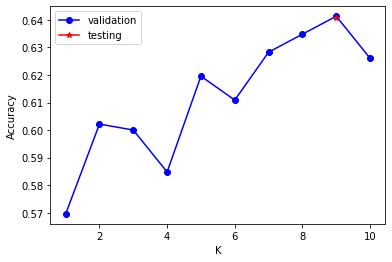

In [ ]:
# further split the training data into 50% training and 50% validation
x_train_tr, y_train_tr = x_train[:460], y_train[:460]
x_train_va, y_train_va = x_train[460:], y_train[460:]

model_choices=[]
valid_acc = []

n_valid = y_train_va.shape[0]

for k in range(1,11):
    knn = KNN(K=k) # create a KNN object (OOP)
    # y_train_va_prob,_ = knn.fit(x_train, y_train).predict(x_train_va) # wrong
    y_train_va_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va) # bug fixed
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy = np.sum(y_train_va_pred == y_train_va)/n_valid
    model_choices.append(k)
    valid_acc.append(accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob,_ = knn.fit(x_train, y_train).predict(x_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
# plt.savefig('iris_KNN_chooseK.png',dpi=300,bbox_inches='tight')

In [ ]:
def eva_accuracy (y_pred, y_test):
  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  return accuracy * 100

In [ ]:
# Use the best k to fit the model and calculate accuracy
model = KNN(K=best_valid_K)

y_train_prob = np.zeros((y_train.shape[0], C))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
    
y_prob, knns = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,axis=-1)    
correct = y_test == y_pred
incorrect = np.logical_not(correct)    
    
print(eva_accuracy(y_pred, y_test))

64.06926406926407


In [ ]:
########################### END ##########################